In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r"C:\Users\Abhishek\Downloads\uber-raw-data-apr14.csv.zip")

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [6]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [7]:
data['Hour'] = data['Date/Time'].dt.hour
data['Day'] = data['Date/Time'].dt.day
data['DayOfWeek'] = data['Date/Time'].dt.dayofweek
data['Month'] = data['Date/Time'].dt.month
data['Weekday Name'] = data['Date/Time'].dt.day_name()
data['Date Only'] = data['Date/Time'].dt.date

In [8]:
data.head()

,Date/Time,Lat,Lon,Base,Hour,Day,DayOfWeek,Month,Weekday Name,Date Only
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,1,4,Tuesday,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,1,4,Tuesday,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,1,4,Tuesday,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,1,4,Tuesday,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,1,4,Tuesday,2014-04-01


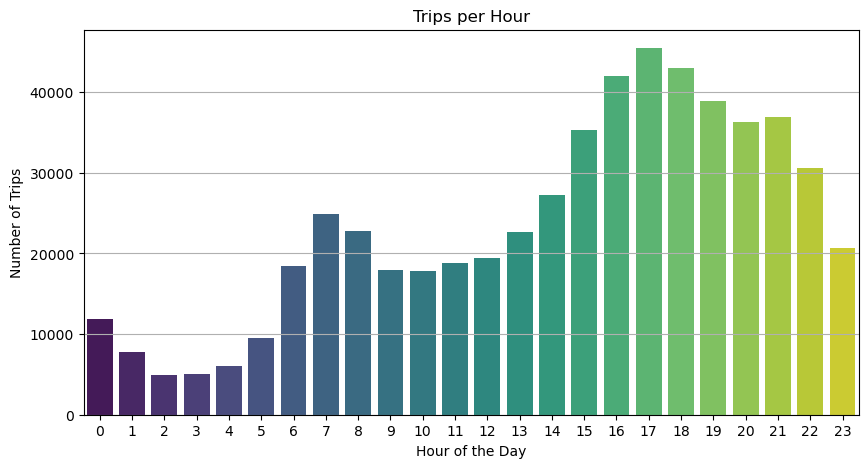

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=data, palette='viridis')
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.show()


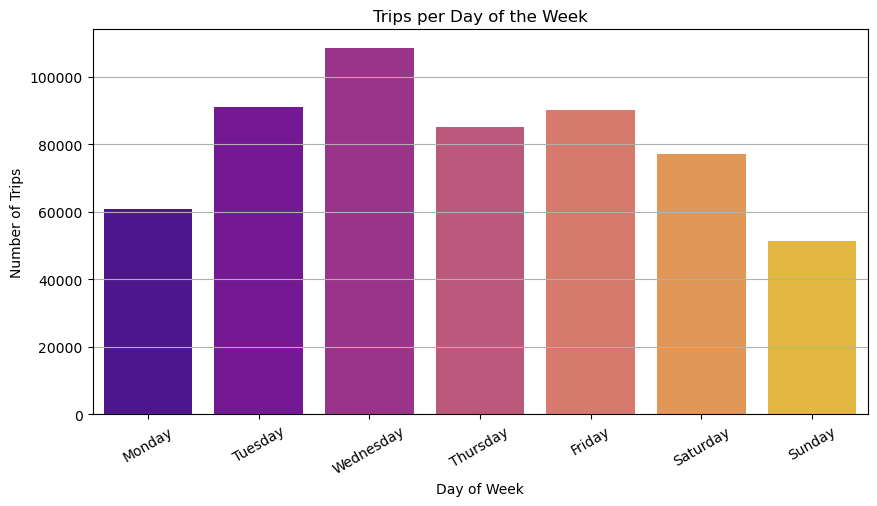

In [10]:
plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday Name', data=data, order=order, palette='plasma')
plt.title('Trips per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

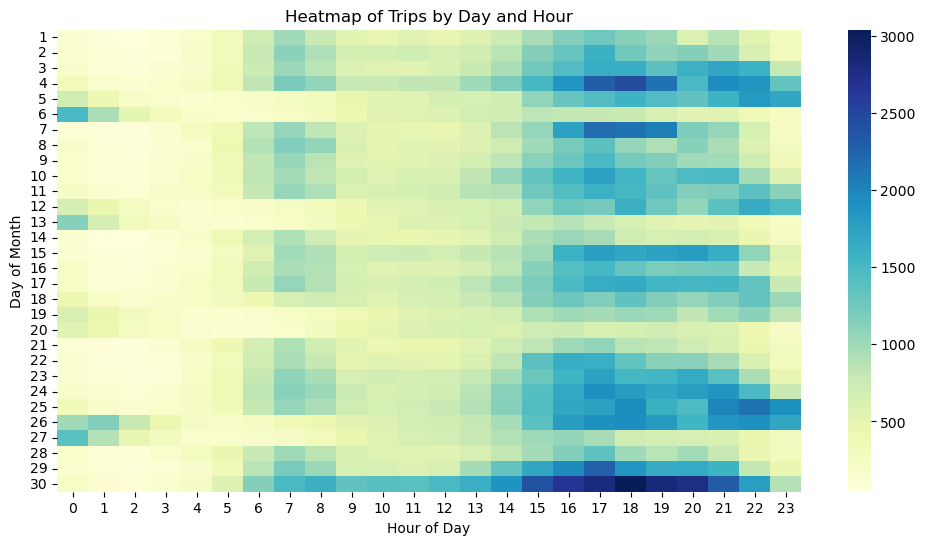

In [11]:
pivot = pd.pivot_table(data, index='Day', columns='Hour', values='Base', aggfunc='count')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Heatmap of Trips by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Month')
plt.show()


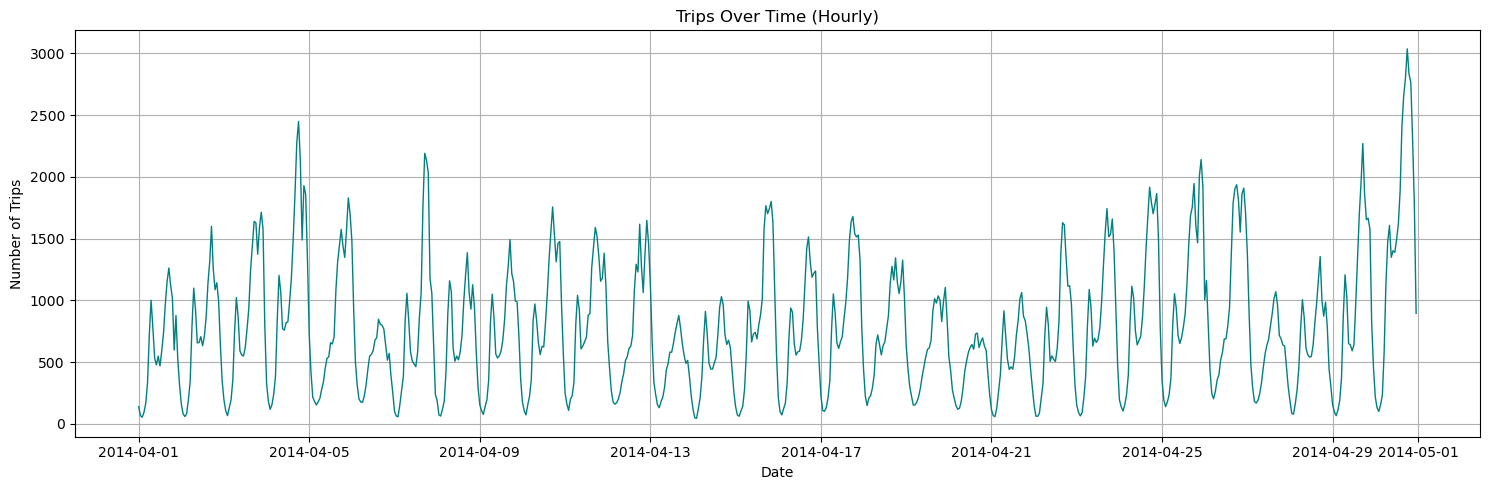

In [12]:
hourly_trips = data.groupby(data['Date/Time'].dt.floor('H')).size().reset_index(name='Trips')
plt.figure(figsize=(15,5))
plt.plot(hourly_trips['Date/Time'], hourly_trips['Trips'], color='teal', linewidth=1)
plt.title('Trips Over Time (Hourly)')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
grouped = hourly_trips.copy()
grouped.rename(columns={'Date/Time': 'Date'}, inplace=True)
grouped['Hour'] = grouped['Date'].dt.hour
grouped['Day'] = grouped['Date'].dt.day
grouped['DayOfWeek'] = grouped['Date'].dt.dayofweek
grouped['Month'] = grouped['Date'].dt.month

In [14]:
X = grouped[['Hour', 'Day', 'DayOfWeek', 'Month']]
y = grouped['Trips']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 17027.899552083327
R² Score: 0.953248991032927


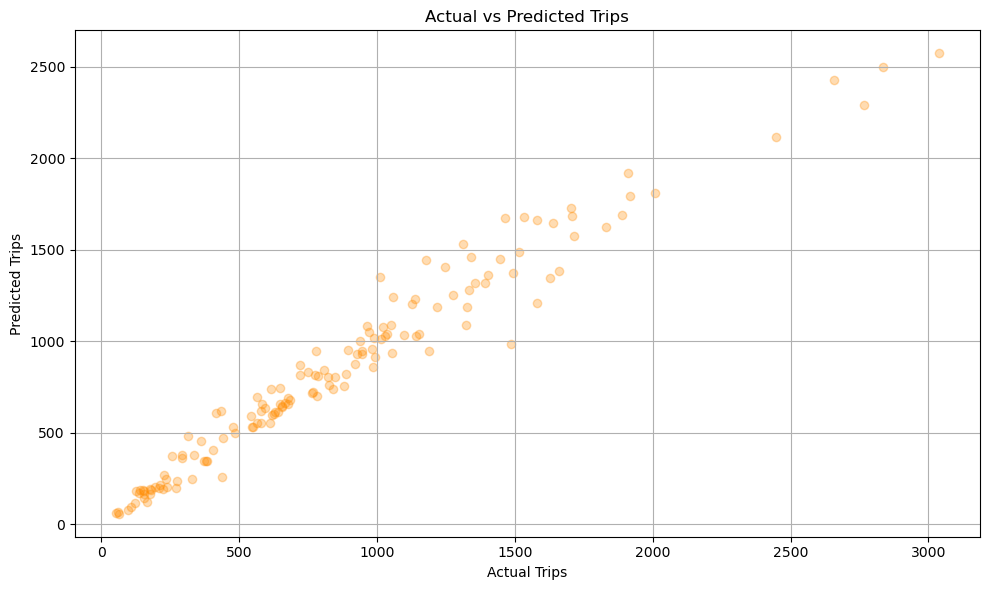

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='darkorange')
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips")
plt.grid(True)
plt.tight_layout()
plt.show()